#Imports

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Scaling & silhouette
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Standard Scaler

In [6]:
df= pd.read_csv('/content/drive/MyDrive/시소프로젝트/1-1 excellent 컷오프 완료.csv',index_col=0)
df.reset_index()
df.head(1)

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,...,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,...,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [7]:
df2 = df.iloc[:,3:]
df2.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,590,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [8]:
column = df2.columns
column

Index(['공원수', '도서관수', '병원수', '배움터수', '동별강좌정원', '사고건수', '독거노인포함', '대중교통', '합계',
       '일반', '65세이상고령자', '전연령별독거노인비율', '노인인구별독거노인비율', 'X', 'Y', '위도UTMK',
       '경도UTMK', '디지털정보지수', '총합 9'],
      dtype='object')

In [9]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns = column)
df2_scaled.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
0,1.995322,2.103655,-0.314159,-0.466936,-0.746355,-0.176186,-1.136415,-0.447988,-1.096052,-0.691643,-1.636607,0.925393,1.00287,0.38401,-0.288785,0.386124,-0.286411,-1.618131,-0.391469


In [10]:
df3 = df2_scaled.copy()
df3.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
0,1.995322,2.103655,-0.314159,-0.466936,-0.746355,-0.176186,-1.136415,-0.447988,-1.096052,-0.691643,-1.636607,0.925393,1.00287,0.38401,-0.288785,0.386124,-0.286411,-1.618131,-0.391469


## KMeans

In [11]:
print('k = 2 일때')
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df2_scaled)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 2 일때
0.18443215937338112
cluster
0    215
1    117
Name: silhoutte_coeff, dtype: int64
cluster
0    0.216500
1    0.125504
Name: silhoutte_coeff, dtype: float64
0.009388664972327335


k = 2 일때


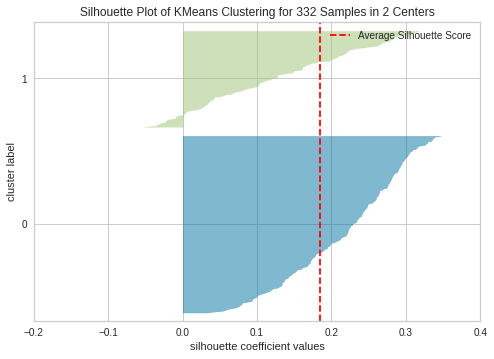

In [12]:
print('k = 2 일때')
kmeans_2 = KMeans(n_clusters=2, random_state=42, init='k-means++')
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(df2_scaled)
visualizer_2.show()

In [13]:
# k값을 다시 나타내기 위해, copy 반복
df3 = df2_scaled.copy()

In [14]:
print('k = 3 일 때')
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df3)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 3 일 때
0.14045934621836653
cluster
0     81
1    146
2    105
Name: silhoutte_coeff, dtype: int64
cluster
0    0.114478
1    0.123509
2    0.184071
Name: silhoutte_coeff, dtype: float64
0.007517350531216333


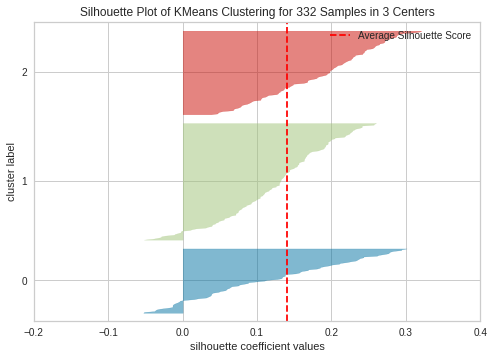

In [15]:
# k = 3 일때
kmeans_3 = KMeans(n_clusters=3, random_state=42, init='k-means++')
#visualizer 생성
visualizer_3 = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(df2_scaled)
visualizer_3.show()

In [16]:
df3 = df2_scaled.copy()

In [17]:
print('k = 4 일 때')
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df3)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 4 일 때
0.13150586217463467
cluster
0     81
1     87
2     62
3    102
Name: silhoutte_coeff, dtype: int64
cluster
0    0.116238
1    0.203200
2    0.189072
3    0.047488
Name: silhoutte_coeff, dtype: float64
0.012953734419435724


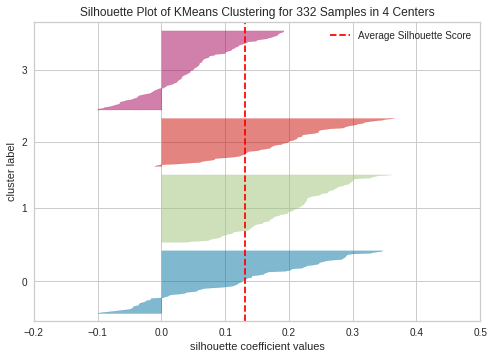

In [18]:
# k = 4 일때
kmeans_4 = KMeans(n_clusters=4, random_state=42, init='k-means++')
#visualizer 생성
visualizer_4 = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_4.fit(df2_scaled)
visualizer_4.show()

In [19]:
df3 = df2_scaled.copy()

In [20]:
print('k = 5 일 때')
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df3)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 5 일 때
0.14357762840660515
cluster
0    90
1    37
2    80
3    66
4    59
Name: silhoutte_coeff, dtype: int64
cluster
0    0.131762
1    0.062075
2    0.220491
3    0.154286
4    0.096446
Name: silhoutte_coeff, dtype: float64
0.011006072439694125


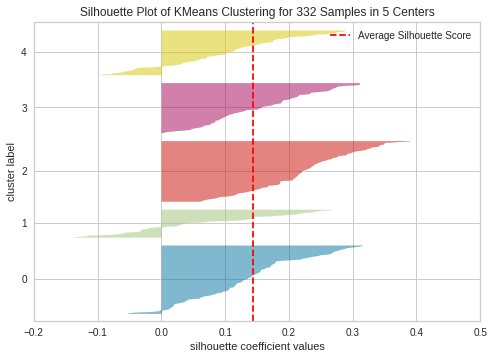

In [21]:
# k = 5 일때
kmeans_5 = KMeans(n_clusters=5, random_state=42, init='k-means++')
#visualizer 생성
visualizer_5 = SilhouetteVisualizer(kmeans_5, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_5.fit(df2_scaled)
visualizer_5.show()